# Maskininlärning Lab PM
## IT-Högskolan


### Introduktion / Problemställning

Det har erhållits ett dataset från Kaggle med data för hjärt-kärlsjukdom hos 70 000 patienter i samband med undersökning.
I detta dataset så finns det 12 "features" med insamlad information från patientundersökningar och en "target" variabel som visar om patienten har hjärt-kärlsjukdom eller inte.
Genom explorativ dataanalys, feature engineering och tillämpning av relevanta maskininlärningsmodeller så skapades och utvärderades modeller för klassificering av förekomst av hjärt-kärlsjukdom.


### Data-analys (EDA)

I en inledande explorativa dataanalysen så gjordes följande observationer:

- Ungefär hälften av de undersökta hade en kardiovaskulär sjukdom. 
- Det var ca en fjärdedel patienter som hade över normala kolesterolvärden
- Åldersfördelningen var skevt fördelad åt höger, vilket indikerade att det relativt sett fanns fler äldre patienter i undersökningen.
- Det var ca 10% som var rökare
- Vikt samt längdfördelning var någorlunda normalfördelat
- Andelen kvinnor med hjärt-kärlsjukdom var nästan dubbelt så hög som män

Vid vidare analys av korrelationer kunde följande observationer göras gällande korrelationer mellan "features" och förekomst av hjärt-kärlsjukdom:

- Ålder hade högst korrelation med förekomst av hjärt-kärlsjukdom (0.24)
- Kolesterol kom på andra plats (0.22)
- Vikt kom på tredje plats (0.18)
- Kön hade i princip ingen korrelation till förekomst av hjärt-kärlsjukdom.

Kommentar till observationerna:

Den inledande explorativa dataanalysen tillsammans med den senare analysen av korrelationer gav en bra inblick i vilka "features" som var mest relevanta för att kunna förutsäga förekomst av hjärt-kärlsjukdom. Det var också intressant att se att kön inte hade någon större påverkan på förekomst av hjärt-kärlsjukdom. Detta fick mig att gräva djupare i detta och jag fann att andelen kvinnor i undersökningen var nästan dubbelt så hög som män. Vid närmare analys och jämförelse av antal sjuka män och kvinnor i förhållande till antal deltagande män och kvinnor, fann jag att andelen var samma. Detta stärkte korrelationsanalysens resultat att kön bland medverkande inte hade någon större påverkan på förekomst av hjärt-kärlsjukdom.


**Nedan följer lite kod som utgjorde underlag för ovanstående observationer**

In [15]:
# Import av bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Inläsning av data
data = pd.read_csv("../Data/cardio_train.csv", delimiter=';')   
# Gör om från antal dagar till årtal som ålder
data["age"] = data["age"]//365

In [17]:
# Antal sjuka och antal friska

total = data["cardio"].count()
positive = data[data["cardio"] == 1]["cardio"].count()
negative = data[data["cardio"] == 0]["cardio"].count()

print(f"Antalet som är positiva för hjärt-kärlsjukdom är {positive} och {negative} är negativa\n")

Antalet som är positiva för hjärt-kärlsjukdom är 34979 och 35021 är negativa



In [18]:
# Uträkning av andel patienter med olika kolesterolvärden

cholesterol_levels = data["cholesterol"].value_counts(normalize=True)

print(f'''Andel patienter med olika kolesterol-värden: 
Normalt kolesterol: {cholesterol_levels.get(1, 0):.2%}
Över normalt kolesterol: {cholesterol_levels.get(2, 0):.2%}
Högt över normalt kolesterol: {cholesterol_levels.get(3, 0):.2%}
Slutsats: Ca en fjärdedel hade högre än normala nivåer
''')


Andel patienter med olika kolesterol-värden: 
Normalt kolesterol: 74.84%
Över normalt kolesterol: 13.64%
Högt över normalt kolesterol: 11.52%
Slutsats: Ca en fjärdedel hade högre än normala nivåer



Text(0.5, 1.0, 'Längdfördelning')

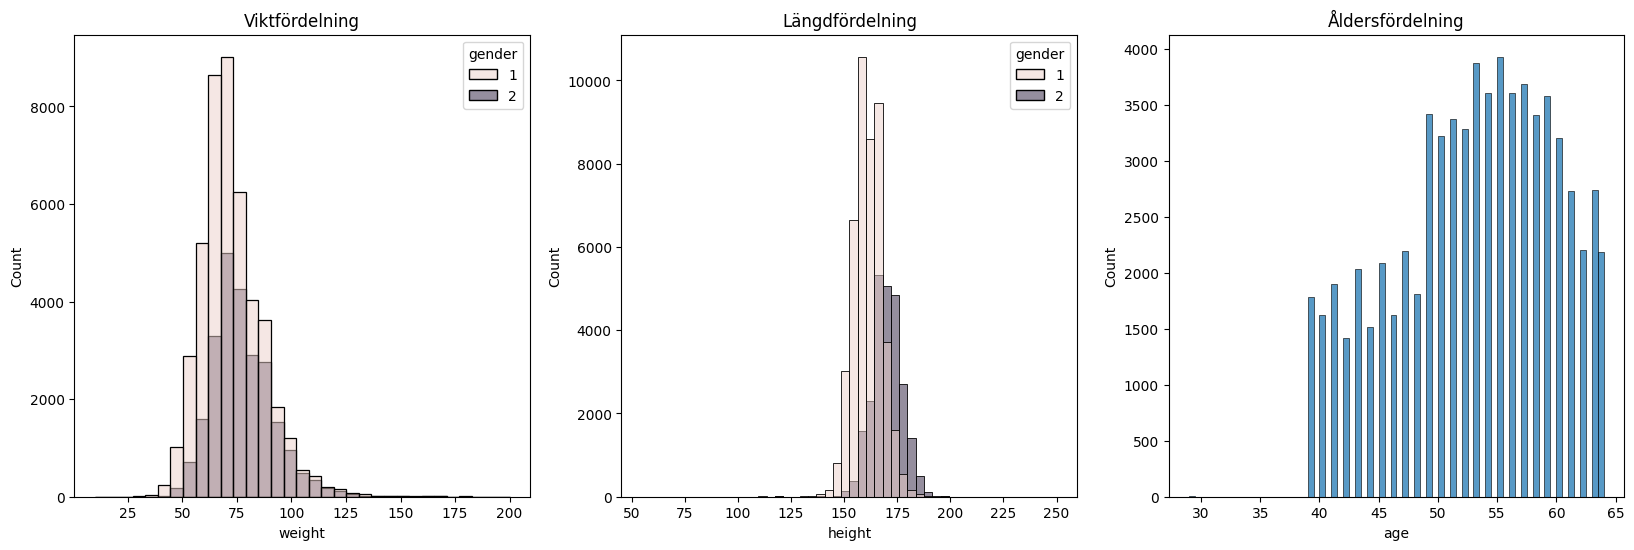

In [19]:
# Plotta diverse fördelningar 

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(x=data["age"], bins=70, ax=axes[2])
axes[2].set_title('Åldersfördelning')

sns.histplot(x=data["weight"], bins=33, hue=data["gender"], ax=axes[0])
axes[0].set_title('Viktfördelning')

sns.histplot(x=data["height"], bins=50, hue=data["gender"], ax=axes[1])
axes[1].set_title('Längdfördelning')

In [20]:
# Andel rökare
smoking_status = data["smoke"].value_counts(normalize=True)

print(f'''Andel rökare och icke-rökare: 
Rökare: {smoking_status.get(1, 0):.2%}
Icke-rökare: {smoking_status.get(0, 0):.2%}
Slutsats: Lite mindre än en tiondel är rökare
''')

Andel rökare och icke-rökare: 
Rökare: 8.81%
Icke-rökare: 91.19%
Slutsats: Lite mindre än en tiondel är rökare



In [21]:
# Jämförelser andel kvinnor män, totalt och jämfört med antal deltagare

gender_counts = data["gender"].value_counts()

total_positive = data["cardio"].sum()

total_males = gender_counts.get(2, 0)
total_females = gender_counts.get(1, 0)

positive_males = data[(data["cardio"] == 1) & (data["gender"] == 2)].shape[0]
positive_females = data[(data["cardio"] == 1) & (data["gender"] == 1)].shape[0]

percentage_males_total = positive_males / total_positive
percentage_females_total = positive_females / total_positive

percentage_females = positive_females / total_females
percentage_males = positive_males / total_males

print(f"Andelen som är positiva för hjärt-kärlsjukdom per kön är {percentage_males_total = :.0%} och {percentage_females_total = :.0%}")
print(f"Andelen positiva för hjärt-kärlsjukdom i varje könskategori är {percentage_females = :.0%} och {percentage_males = :.0%}")



Andelen som är positiva för hjärt-kärlsjukdom per kön är percentage_males_total = 35% och percentage_females_total = 65%
Andelen positiva för hjärt-kärlsjukdom i varje könskategori är percentage_females = 50% och percentage_males = 51%


<Axes: >

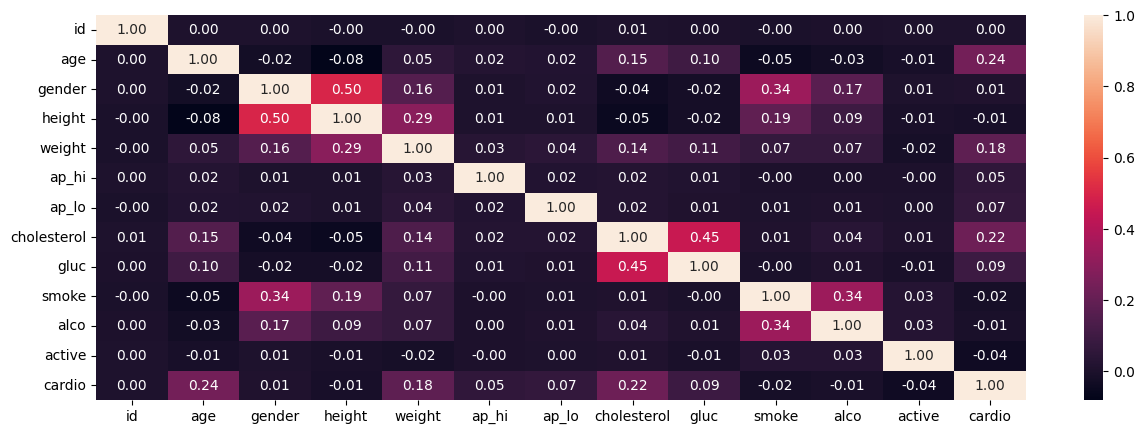

In [22]:
# Korrelationsanalys

fig = plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, fmt=".2f")

### Vidare analys - feature engineering

- Det skapades en ny "feature", Body Mass Index (BMI) som beräknades som $\frac{\text{vikt}}{\text{längd}^2}$ 
    - BMI delades in i kategorierna "normal range", "overweight", "obese (class I)", "obese (class II)" och "obese (class III)".
    - Data filtrerades så att enbart BMI mellan 15-50 behölls, utifrån en bedömning av rimliga gränser efter granskning av Wikipedias artikel om BMI.

- Det skapades även en ny "feature" för blodtryckskategorierna: "Healthy", "Elevated", "Stage 1 hypertension", "Stage 2 hypertension", "Hypertension crisis" utifrån riktvärden från den artikel som laborationen hänvisade till.
    - Data filtrerades för att inkludera systolisk blodtryck mellan 70 och 180, samt diastoliskt blodtryck mellan 40 och 120. Detta utifrån en samlad bedömning från information i 1177, och den individuella faktorn som behöver tas hänsyn till när en patients blodtryck bedöms.

- Nya features gjordes om till kategoriska variabler i ordinalskala för att undersöka eventuella korrelationer till förekomst av hjärt-kärlsjukdom.
    - BMI hade en liknande korrelation som vikt och längd men lite högre (0.20) och kan vara så att BMI fångar ett mer komplext samband mellan vikt och längd i förhållande till sjukdom som korrelerar bättre.
    - BMI hade 0.86 korrelation med vikt och -0.2 med längd, vilket kan bero på att längden inte direkt proportioneras med vikten i BMI-formeln.
    - Eftersom ordinalskalan som valdes för kategorierna inte har konstanta avstånd, så tolkades korrelationerna med försiktighet och som en indikation på att det kan finnas ett samband inför kommande analyser med andra metoder.

***Det som kunde konstateras summeringsvis var att den data som insamlats från undersökningarna inte hade självklara och tydliga samband med diagnoserna som ställts på förekomst av hjärt-kärlsjukdom. Detta kan bero på att det finns andra faktorer som inte har samlats in som kan vara relevanta för att kunna förutsäga förekomst av hjärt-kärlsjukdom.***


## Modell

Algoritmer för klassificering som användes var K-Nearest Neighbors, Logistic Regression, Random Forest, Support Vector Machine och Naive Bayes. Hyperparametrar som testades var antal neighbors för K-Nearest Neighbors, l1 ratio för Logistic Regression, n_estimators och max_depth för Random Forest, C och kernel('linear','rbf') för Support Vector Machine.
Via pipelines och gridsearchCV så optimerades hyperparametrar för modellerna.

Lite mer om Random Forest (källa: Lecture code):
- Kombinear flera beslutsträd på bootstrappade urval
- Väljer slumpmässigt $m \approx \sqrt{p}$ prediktorer/egenskaper som uppdelningskandidater
- Väljer en av dessa $m$ egenskaper för uppdelningen
- nya $m$ egenskaper väljs för varje uppdelning

In [ ]:
# Skapande av modellen och relaterad kod

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data_1 = pd.read_csv("data_1.csv")
X, y = data_1.drop("cardio", axis=1), data_1["cardio"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

pipe_rf = Pipeline([("scaler", scaler), ("rf", RandomForestClassifier())])

param_grid_rf = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10],
}

classifier_rf = GridSearchCV(estimator=pipe_rf, param_grid=param_grid_rf, cv=3, scoring="recall")

classifier_rf.fit(X_train, y_train)


## Resultat 

I evalueringen så betonades recall, då vikten av att faktiskt upptäcka en förekomst av sjukdom bedömdes vara viktigare än att felaktigt identifiera en frisk person som sjuk. 

I termer av högst recall (65%) var random forest bäst, följt av K-Nearest Neighbors (63%), men där random forest hade mycket mindre körtid för modellen, mindre beräkningsintensivt. Därav valdes den modellen för vidare tillämpning. Det dataset av de två skapade som hade bäst recall var det som inkluderade BMI och blodtryckskategorierna, vilket var det dataset som behölls. Skillnaderna var dock inte så avsevärda (65% vs 64% recall). Resultat och slutsatser har redovisats utifrån det datasetet.

**Mer om modellen och evalueringen** 
- Optimala värden erhölls för hyperparametrar och var n_estimators = 100 och max_depth = None
- Bedömningen var att evalueringen påvisade att modellen inte var tillräckligt bra för ändamålet, vilket kunde anas redan i den inledande explorativa dataanalysen. 
- 100 slumpmässigt valdes från datasetet och sparades. Därefter tillämpades den bästa modellen på resterande rader och sparades i en .pkl-fil med hjälp av joblib.dump().
När modellen sedan tillämpades på resterande 100 rader, så var resultatet på recall sämre: 52 %.


In [35]:
# Hyperparameter värden optimala

classifier_rf.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__monotonic_cst': None,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

In [32]:
# Kod för sammanställning av resultat
results = {
    'Modell': ['KNN', 'Log_reg', 'Random F', 'SVM', 'Naive Bayes'],
    'Dataset 1 Recall': ['63 %', '58 %', '65 %', '59 %', '45 %'],
    'Dataset 2 Recall': ['64 %', '61 %', '64 %', '57 %', '52 %']
}
df_results = pd.DataFrame(results)

df_results

,Modell,Dataset 1 Recall,Dataset 2 Recall
0,KNN,63 %,64 %
1,Log_reg,58 %,61 %
2,Random F,65 %,64 %
3,SVM,59 %,57 %
4,Naive Bayes,45 %,52 %


Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      9368
           1       0.64      0.65      0.64      8015

    accuracy                           0.67     17383
   macro avg       0.67      0.67      0.67     17383
weighted avg       0.67      0.67      0.67     17383



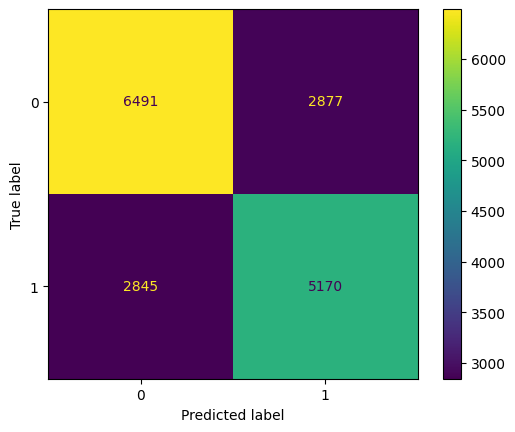

In [33]:
# Prediction och evaluering mer specifikt för bästa modellen

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Predictions och evaluering
y_pred_rf = classifier_rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()

# Diskussion

Det var ingen modell som särskilt stack ut från mängden avsevärt med avseende på recall. 
Random Forests styrkor hade kunnat lyftas, såsom att kombination av flera träd kan fånga komplexa mönster som KNN inte fångar o.s.v., men skillnaderna var så små att det var svårt att utse en "vinnare". Snarare påvisades modellerna vara svaga i förhållande till ändamålet. 
Det påvisades redan i början att starka korrelationer saknades mellan "features" och förekomst av hjärt-kärlsjukdom, vilket kan vara en förklaring till att modellerna inte presterade bättre.
Det i sig kan ha varit ett resultat av att det finns andra faktorer som inte finns med som "feature" och som hade kunnat förbättra modellerna. 
Hjärt och kärlsjukdomar är komplexa och med brist på bättre kännedom om vad som specifikt ansågs vara tillräckligt för att diagnotiseras som hjärt-kärl sjuk, och med brist på avgränsande faktorer för specifika hjärt-kärlsjukdomar så kan det ha bidragit till att modellerna inte presterade bättre.
Tillämpning av den sista modellen på de 100 resterande raderna påvisade igen att modellen inte var tillräckligt robust, med tanke på minskningen i recall som skedde i samband med detta. 